In [398]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [399]:
#Load the dataset
df=pd.read_csv('Car_Price_Prediction.csv')
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [401]:
df['Make'].unique()

array(['Honda', 'Ford', 'BMW', 'Audi', 'Toyota'], dtype=object)

In [402]:
df['Mileage'].unique()

array([ 74176,  94799,  98385,  88919, 138482,  81462, 179340, 165320,
        31159,  42039,  47800,  40761,  94626, 118368, 174735,  80903,
       171484, 118998, 166439, 136885,  59894,  51444, 165341,  61748,
        41190,  40318, 168090, 124078,  39759,  16498,  25989, 156640,
       117035,  66577, 105231, 161171,  89900, 171711, 104679,  23482,
        69212, 186333,  30048, 134137, 133108,  35814, 190766, 147996,
       129493,  60204,  32844,  81943,  21518, 148131,  23052,  69803,
        71524,  89572, 139752,  67021,  20043,   2419, 187964, 121831,
       101799, 148212, 174556, 194941, 176282,  57600, 116467,  78497,
       108611, 137559,  60692,  62112, 162182,  16360, 180482,  83038,
         3017,  86261, 191196, 182021, 189340,  66320,  31127, 134268,
        75088, 172372, 180786,  31921,   4746,  68535,  65350, 181417,
       180292,  81131,  22063, 117116,  88913,  78946, 177043, 134670,
        10564,  49725,  86134, 105940, 191012,  62085,  17862,  10265,
      

In [403]:
df['Price'].unique()

array([30246.20793121, 22785.74768433, 25760.29034717, 25638.00349071,
       21021.38665739, 25509.93287629, 12268.20602523, 27783.73788099,
       27392.17842052, 28434.53362362, 29404.95400506, 36811.01281669,
       25205.00395937, 27796.07550135, 23521.88168355, 26493.1832312 ,
       16626.37944501, 21122.18914162, 21853.33258715, 34716.9800197 ,
       32761.64549909, 23469.16158943, 20093.07080877, 18920.31855484,
       20152.09690167, 21520.12291775, 23293.13030872, 23633.38954774,
       29288.89578863, 25839.54216183, 25546.58880083, 14089.7884084 ,
       22788.32129596, 27694.61192854, 15961.21390288, 22519.39025009,
       19181.81635933, 16604.4981698 , 23648.41735743, 37032.60751681,
       28849.57939888, 25844.62473357, 31479.64694322, 14502.97586812,
       17622.00458952, 26785.39816863, 28722.71774327, 20951.40955858,
       19794.71897813, 30130.30956258, 29445.48311356, 24753.59681453,
       22407.7226835 , 23895.75456202, 31599.82614854, 23726.57862526,
      

In [404]:
df['Fuel Type'].unique()

array(['Petrol', 'Electric', 'Diesel'], dtype=object)

In [405]:
df.describe()

,Year,Engine Size,Mileage,Price
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,2010.688000,2.798300,97192.48700,25136.615530
std,6.288577,1.024137,59447.31576,5181.401368
min,2000.000000,1.000000,56.00000,6704.953524
25%,2005.000000,1.900000,44768.75000,21587.878370
50%,2011.000000,2.800000,94411.50000,25189.325247
75%,2016.000000,3.700000,148977.75000,28806.368974
max,2021.000000,4.500000,199867.00000,41780.504635


<Axes: ylabel='Year'>

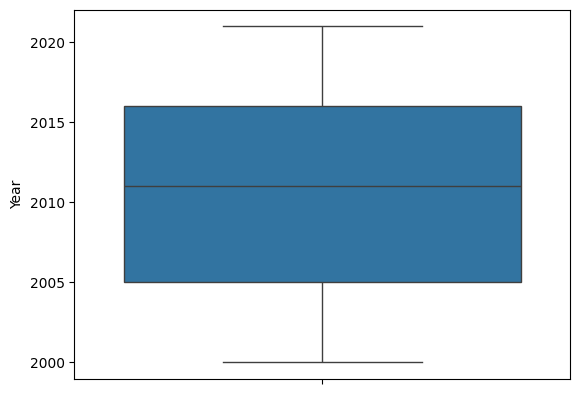

In [406]:
sns.boxplot(y='Year',data=df)

<Axes: ylabel='Engine Size'>

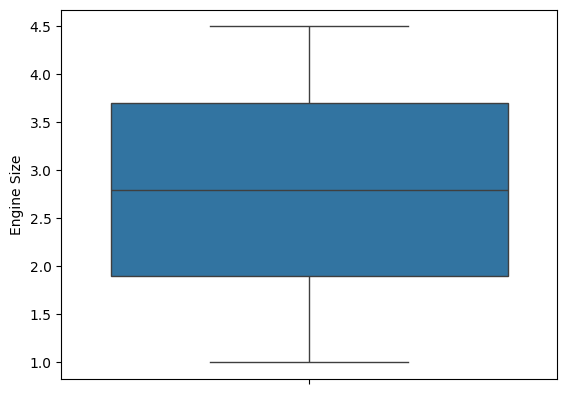

In [407]:
sns.boxplot(y='Engine Size',data=df)

<Axes: ylabel='Mileage'>

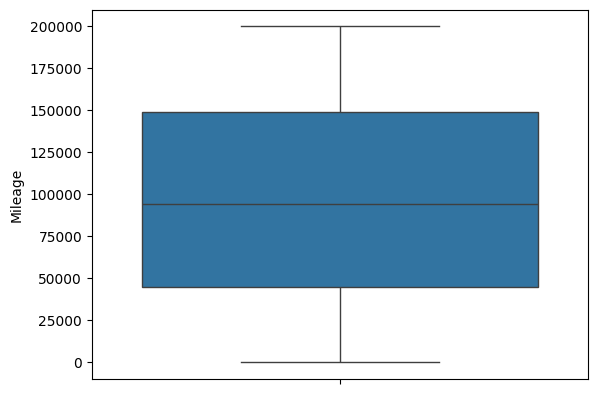

In [408]:
sns.boxplot(y='Mileage',data=df)

<Axes: ylabel='Price'>

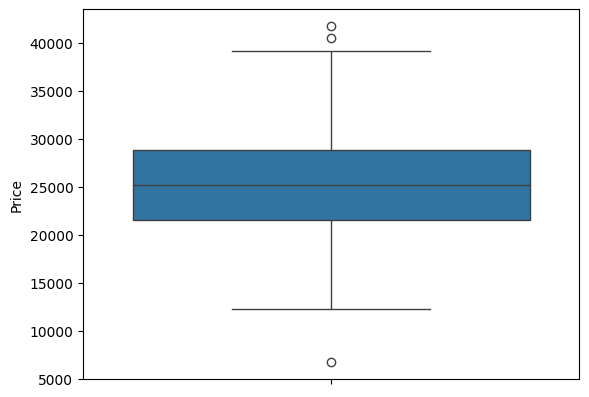

In [409]:
sns.boxplot(y='Price',data=df)

In [410]:
df.shape

(1000, 8)

In [411]:
copied_dataset=df.copy()
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
df['Make']=obj.fit_transform(df['Make'])
df['Model']=obj.fit_transform(df['Model'])
df['Fuel Type']=obj.fit_transform(df['Fuel Type'])
df['Transmission']=obj.fit_transform(df['Transmission'])
df

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,3,1,2015,3.9,74176,2,1,30246.207931
1,2,2,2014,1.7,94799,1,0,22785.747684
2,1,1,2006,4.1,98385,1,1,25760.290347
3,3,1,2015,2.6,88919,1,0,25638.003491
4,3,2,2004,3.4,138482,2,0,21021.386657
...,...,...,...,...,...,...,...,...
995,4,3,2002,1.9,5445,2,1,22765.597091
996,3,1,2020,3.1,149112,0,1,30392.575567
997,2,2,2008,1.9,195387,2,0,16446.892292
998,4,0,2003,4.4,246,2,0,27396.156708


In [412]:
copied_dataset

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657
...,...,...,...,...,...,...,...,...
995,Toyota,Model D,2002,1.9,5445,Petrol,Manual,22765.597091
996,Honda,Model B,2020,3.1,149112,Diesel,Manual,30392.575567
997,Ford,Model C,2008,1.9,195387,Petrol,Automatic,16446.892292
998,Toyota,Model A,2003,4.4,246,Petrol,Automatic,27396.156708


In [413]:
X=df.iloc[:,:-1]
y=df['Price']

In [414]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [415]:
model = RandomForestRegressor(n_estimators=200,max_depth=4)
model.fit(Xtrain,ytrain)

,n_estimators,200
,criterion,'squared_error'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [416]:
print('training efficiency:',model.score(Xtrain,ytrain))
print('testing efficiency:',model.score(Xtest,ytest))

training efficiency: 0.8183666751122649
testing efficiency: 0.755638356159687


In [417]:
model1=RandomForestRegressor(random_state=42)
params={
    "n_estimators":[100,150,300,350],
    "max_depth":[3,4,5]
}

In [418]:
grid=GridSearchCV(estimator=model1,param_grid=params,cv=5)
grid.fit(Xtrain,ytrain)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [3, 4, ...], 'n_estimators': [100, 150, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,350


In [419]:
print('training efficiency:',grid.score(Xtrain,ytrain))
print('testing efficiency:',grid.score(Xtest,ytest))

training efficiency: 0.8705888976210301
testing efficiency: 0.7843431942996396


In [420]:
model2=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
model2.fit(Xtrain,ytrain)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [421]:
print('trainig',model2.score(Xtrain,ytrain))
print('testing',model2.score(Xtest,ytest))

trainig 0.9059809662227692
testing 0.794305092278189


In [426]:
model3=XGBRegressor(n_estimators=150,learning_rate=0.5,random_state=42,max_depth=2)
model3.fit(Xtrain,ytrain)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [427]:
print('trainig',model3.score(Xtrain,ytrain))
print('testing',model3.score(Xtest,ytest))

trainig 0.9160761686000498
testing 0.762915077018481


In [424]:
with open('RFmodel.pkl','wb') as file:
    pickle.dump(grid,file)

In [425]:
copied_dataset.to_csv('copied.csv')